In [8]:

####################################################################################################
####################################################################################################

import sys
import os.path

import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import BoundaryNorm, LogNorm, Normalize
import numpy as np
import pandas as pd

from IPython.display import display
from IPython.display import Image

sys.path.append('/project/lgrandi/dbarge/')

print()
print("-> Python Executable (sys.executable):   " + sys.executable)
print("-> Python Path (sys.path):")
for x in sys.path: print("   " + x)
print()


####################################################################################################
####################################################################################################

import pax
print("-> Pax version: " + pax.__version__)


####################################################################################################
####################################################################################################


from pax_utils import s1s2_utils
from pax_utils.helpers import *


####################################################################################################
####################################################################################################

import tensorflow as tf

print ("-> Tensorflow version:   " + tf.__version__ + "\n")

import keras
import keras.utils.vis_utils
from keras import backend as K
from keras import layers
from keras import regularizers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model


####################################################################################################
####################################################################################################

from models import *


####################################################################################################
####################################################################################################

v_drift = 1.44e-4

print("Ready")



-> Python Executable (sys.executable):   /project/lgrandi/dbarge/anaconda3/envs/ml_py365/bin/python
-> Python Path (sys.path):
   
   /project/lgrandi/dbarge/pax_v6.5.1
   /home/dbarge/reconstruction/z_s2waveforms
   /project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python36.zip
   /project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6
   /project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/lib-dynload
   /project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages
   /project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/Mako-1.0.7-py3.6.egg
   /project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/IPython/extensions
   /home/dbarge/.ipython
   /project/lgrandi/dbarge/
   /project/lgrandi/dbarge/

-> Pax version: 6.5.1
-> Tensorflow version:   1.10.0

Ready


In [2]:

####################################################################################################
####################################################################################################

nEventsTrain = 100000
file_all     = '/project/lgrandi/dbarge/simulation/wimp/pax_v6.8.3/merged/merged_all_200000.pkl'

df_all   = pd.read_pickle(file_all)
df_all   = df_all[df_all['intr_count'] == 1].reset_index(drop=True)
df_all   = df_all[0:nEventsTrain][:]

df_all['intr_depth'] = v_drift*df_all['intr_drift_time'] 


####################################################################################################
####################################################################################################

df_train_truth = df_all[:][['depth']]
df_train_input = df_all[:][['intr_depth']]


####################################################################################################
####################################################################################################

checkTrainingData(df_train_input, df_train_truth)




Input shape: (100000, 1)
Truth shape: (100000, 1)

Input DataFrame: 


,intr_depth
0,57.83616
1,58.27248
2,34.41168
3,64.75680
4,51.72192



Truth DataFrame:


,depth
0,57.456815
1,57.780505
2,34.074937
3,64.494053
4,51.510242


(100000, 156)


/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


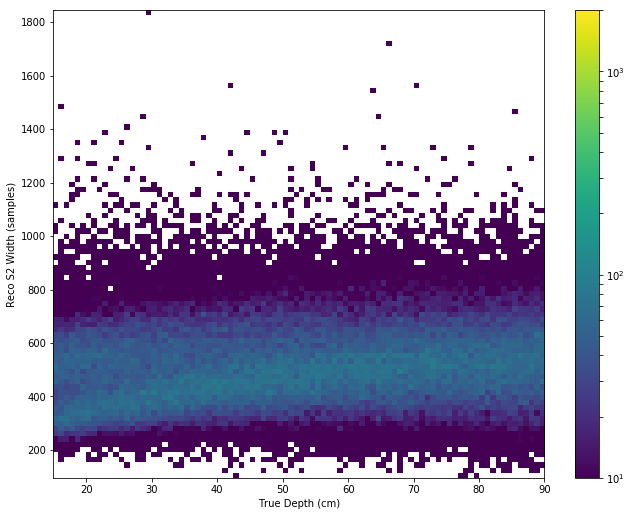

/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


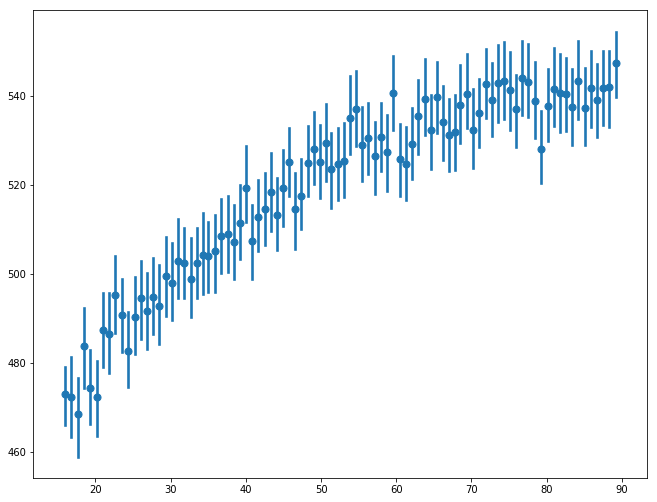

In [60]:

print(df_all.shape)

arr_s2_width = df_all['event_s2_length'].as_matrix()
arr_s2_z     = df_all['depth'].as_matrix()

plt.figure(figsize=(11, 8.6))
h = plt.hist2d(arr_s2_z, arr_s2_width, bins=90, norm=LogNorm(10, 2*10e2))
#plt.colorbar()
plt.xlabel('True Depth (cm)')
plt.ylabel('Reco S2 Width (samples)')
plt.colorbar(h[3])

##import plt.colormaps as cmaps
#plt.register_cmap(name='viridis', cmap=cmaps.viridis)
#plt.set_cmap(cmaps.viridis)

plt.show()


import seaborn as sns

plt.figure(figsize=(11, 8.6))
sns.regplot(x=arr_s2_z, y=arr_s2_width, x_bins=90, fit_reg=None)

In [15]:

##########################################################################################
##########################################################################################

lst_models = [
    bargeModel_z()
]



In [3]:

##########################################################################################
##########################################################################################

for iModel in range(0, len(lst_models)):
    
    ######################################################################################
    ######################################################################################

    model, model_name = lst_models[iModel]
    
    
    ######################################################################################
    ######################################################################################

    epochs     = 10
    batch_size = 64
    verbose    = 1
    
    
    ######################################################################################
    # Fit Model
    ######################################################################################
    
    print()
    #print("Model Summary:")
    #model.summary()
    print()
    model.fit(df_train_input, df_train_truth, epochs=epochs, batch_size=batch_size, verbose=verbose)
    print("Training Complete!")

        
    ######################################################################################
    # Save Model
    ######################################################################################

    folder   = "models" + "/"    
    name     = 'model' + '_' + model_name + '_' + 'elu' #model.activation
    name_h5  = folder + name + ".h5"
    name_png = folder + name + ".png"

    model.save(name_h5, overwrite=True)
        
   
    ######################################################################################
    ######################################################################################

    plot_model(model, to_file=name_png, show_layer_names=True, show_shapes=True)
    
    Image(filename=name_png) 
    

    ######################################################################################
    ######################################################################################
    
    continue
    
    

NameError: name 'lst_models' is not defined